In [38]:

from src.trainer import train_dqn, train_Hdqn, epsilon_greedy_action_with_mask, epsilon_greedy_action
from src.agents import DQN_Agent, HDQN_Agent

import ale_py
import gymnasium as gym
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

from tqdm.auto import tqdm
from IPython.display import clear_output

import time
import torch

import lightning as L

from src.environments.montezuma import CreateMontezumaRevengeEnv
from lightning.fabric import Fabric

In [7]:
fabric = Fabric()

In [10]:
model_dict = fabric.load(path="state.ckpt")["model"]

In [14]:
agent = HDQN_Agent(n_subgoals=7)

In [15]:
agent.load_state_dict(model_dict)

<All keys matched successfully>

In [16]:
env = CreateMontezumaRevengeEnv(track_obj=True)

A.L.E: Arcade Learning Environment (version 0.10.1+unknown)
[Powered by Stella]


In [17]:
def draw(obs, info):
    obs[info["char_pos"][0], info["char_pos"][1]] = 255

    for c in ["ladder_pos", "key_pos", "door_pos"]:
        for x, y in info[c]:
            obs[x][y] = 255

In [26]:
obs.shape

(4, 84, 84)

In [28]:
agent.meta_ctrl.get_value(torch.tensor(obs)[None, :])

tensor([[27.1901,  1.1189,  7.7305,  2.3077,  1.7944,  2.9769,  0.9603]],
       grad_fn=<AddmmBackward0>)

In [30]:
epsilon_greedy_action_with_mask(
    agent.meta_ctrl,
    0,
    obs,
    env.ACTION_SPACE_META,
    info["intrinsic_dones"]
)

2

In [39]:
epsilon_greedy_action(
    agent.ctrl,
    0,
    env.encode_goal(obs, info, 1),
    env.action_space
)

9

In [44]:
obs, info = env.reset()
info

{'lives': 5,
 'episode_frame_number': 2528,
 'frame_number': 9128,
 'char_pos': array([105,  79]),
 'ladder_pos': array([[159,  24],
        [159, 136]]),
 'key_pos': array([[106,  16]]),
 'door_pos': array([[ 72,  22],
        [ 72, 138]]),
 'goal_list': [(array([105,  79]), True, (6, 6)),
  (array([106,  16]), True, (12, 4)),
  (array([159,  24]), True, (12, 4)),
  (array([159, 136]), True, (12, 4)),
  ((0, 0), False, (12, 4)),
  (array([72, 22]), True, (17, 10)),
  (array([ 72, 138]), True, (17, 10))],
 'intrinsic_rewards': [49.9, -0.1, -0.1, -0.1, 49.9, -0.1, -0.1],
 'intrinsic_dones': [True, False, False, False, True, False, False]}

In [5]:
obs.shape

(4, 84, 84)

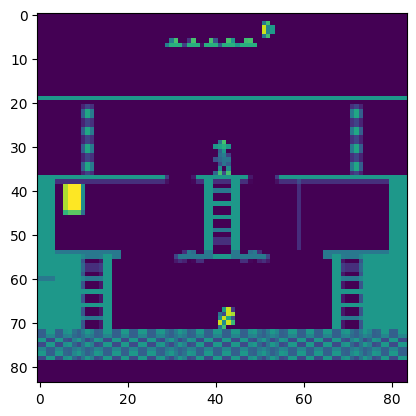

In [6]:
t = env.encode_goal(obs, info, 1)
plt.imshow(t.max(axis=0))


In [15]:
info["intrinsic_rewards"]

[1, 0, 0, 0, 0, 0, 0]

In [45]:
obs, info = env.reset()
while True:
    # goal = epsilon_greedy_action_with_mask(
    #     agent.meta_ctrl, 0, obs, env.ACTION_SPACE_META, info["intrinsic_dones"]
    # )

    goal = 3

    action = epsilon_greedy_action(
        agent.ctrl, 0, env.encode_goal(obs, info, goal), env.action_space
    )

    # action = env.action_space.sample()
    obs, reward, done, truncation, info = env.step(action)

    s = obs[-1]
    # # draw(s, info)
    ifshow = True

    t = env.encode_goal(obs, info, goal)
    s = t.max(axis=0)

    # for i in range(1, len(info["intrinsic_rewards"])):

    #     if info["intrinsic_rewards"][i] > 0:
    #         t = env.encode_goal(obs, info, i)
    #         # plt.imshow(t.max(axis=0))
    #         s = t.max(axis=0)
    #         ifshow = True
    #         break

    # print(info["intrinsic_rewards"])
    clear_output(wait=True)
    plt.imshow(s)
    plt.axis("off")  # Hide the axis
    plt.show()

    if ifshow:
        time.sleep(0.01)

    if done or truncation:
        state, _ = env.reset()

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [11]:

obs, info = env.reset()
while True:
    action = env.action_space.sample()
    obs, reward, done, truncation, info = env.step(action)

    # s = obs[-1]
    # draw(s, info)


    # print(info["intrinsic_rewards"])
    # clear_output(wait=True)
    # plt.imshow(s)
    # plt.axis('off')  # Hide the axis
    # plt.show()

    if done or truncation:
        state, _ = env.reset()

KeyboardInterrupt: 